In [1983]:
import pandas as pd
import numpy as np

In [1984]:
df_house_data=pd.read_csv('House-Rent-Data/House_Rent_Dataset.csv')

In [1985]:
import re
pattern=r'(^[\w ]*) out[a-zA-Z ]*([\d]*)'
df_house_data[['FloorNo','TotalFloor']] = df_house_data['Floor'].str.extract(pattern)

In [1986]:
df_house_data['Posted On']=pd.to_datetime(df_house_data['Posted On'])
df_house_data['Day']=df_house_data['Posted On'].dt.day_name()
df_house_data['Month']=df_house_data['Posted On'].dt.month_name()
columns=df_house_data.columns
print(columns)

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'FloorNo', 'TotalFloor', 'Day',
       'Month'],
      dtype='object')


In [1987]:
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with the specified columns
# # Replace df with the actual name of your DataFrame

# columns_to_compare = ['BHK', 'Size', 'Floor', 'Bathroom', 'FloorNo', 'TotalFloor']

# for column in columns_to_compare:
#     plt.scatter(df_house_data[column], df_house_data['Rent'], alpha=0.5)
#     plt.title(f'Scatter Plot: {column} vs Rent')
#     plt.xlabel(column)
#     plt.ylabel('Rent')
#     plt.show()

In [1988]:
df_house_data=df_house_data.drop(columns=['Posted On','Floor'])
columns=df_house_data.columns
print(columns)

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'FloorNo', 'TotalFloor', 'Day', 'Month'],
      dtype='object')


In [1989]:
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with the specified columns
# # Replace df with the actual name of your DataFrame

# columns_to_compare = ['BHK', 'Size', 'Area Type', 'Bathroom', 'FloorNo', 'TotalFloor']

# for column in columns_to_compare:
#     plt.scatter(df_house_data[column], df_house_data['Rent'], alpha=0.5)
#     plt.title(f'Scatter Plot: {column} vs Rent')
#     plt.xlabel(column)
#     plt.ylabel('Rent')
#     plt.show()


In [1990]:
filtered_df = df_house_data.loc[df_house_data['Rent'] < 80000].reset_index(drop=True)
# filtered_df = filtered_df.loc[filtered_df['Bathroom']<=5].reset_index(drop=True)
filtered_df = filtered_df.loc[filtered_df['Size']<=3500].reset_index(drop=True)
# filtered_df = filtered_df.loc[filtered_df['BHK']<=5].reset_index(drop=True)
# filtered_df = filtered_df.loc[filtered_df['Area Type'].isin(['Super Area', 'Carpet Area'])].reset_index(drop=True)

filtered_df.reset_index

df_house_data=filtered_df

df_house_data.dropna(inplace=True)
df_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4200 entries, 0 to 4203
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4200 non-null   int64 
 1   Rent               4200 non-null   int64 
 2   Size               4200 non-null   int64 
 3   Area Type          4200 non-null   object
 4   Area Locality      4200 non-null   object
 5   City               4200 non-null   object
 6   Furnishing Status  4200 non-null   object
 7   Tenant Preferred   4200 non-null   object
 8   Bathroom           4200 non-null   int64 
 9   Point of Contact   4200 non-null   object
 10  FloorNo            4200 non-null   object
 11  TotalFloor         4200 non-null   object
 12  Day                4200 non-null   object
 13  Month              4200 non-null   object
dtypes: int64(4), object(10)
memory usage: 492.2+ KB


 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4221 non-null   int64 
 1   Rent               4221 non-null   int64 
 2   Size               4221 non-null   int64 
 3   Area Type          4221 non-null   object
 4   Area Locality      4221 non-null   object
 5   City               4221 non-null   object
 6   Furnishing Status  4221 non-null   object
 7   Tenant Preferred   4221 non-null   object
 8   Bathroom           4221 non-null   int64 
 9   Point of Contact   4221 non-null   object
 10  FloorNo            4221 non-null   object
 11  TotalFloor         4221 non-null   object
 12  Month              4221 non-null   object

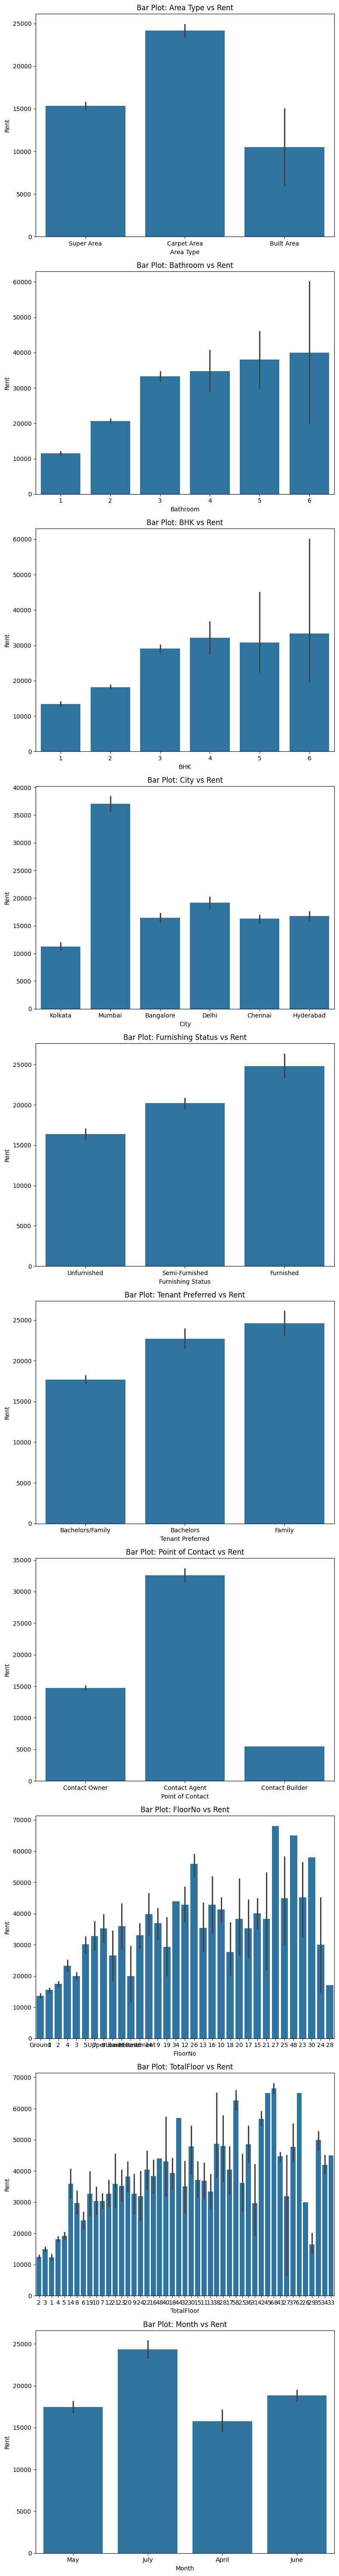

In [1991]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importing seaborn for better styling

# Assuming df is your DataFrame with the specified columns
# Replace df with the actual name of your DataFrame

columns_to_compare = ['Area Type', 'Bathroom', 'BHK','City','Furnishing Status','Tenant Preferred','Point of Contact','FloorNo','TotalFloor','Month']

# Set up subplots for bar graphs
fig, axes = plt.subplots(nrows=len(columns_to_compare), ncols=1, figsize=(8, 6 * len(columns_to_compare)))

for i, column in enumerate(columns_to_compare):
    # Bar plot
    sns.barplot(x=column, y='Rent', data=df_house_data, ax=axes[i])
    axes[i].set_title(f'Bar Plot: {column} vs Rent')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Rent')

plt.tight_layout()
plt.show()


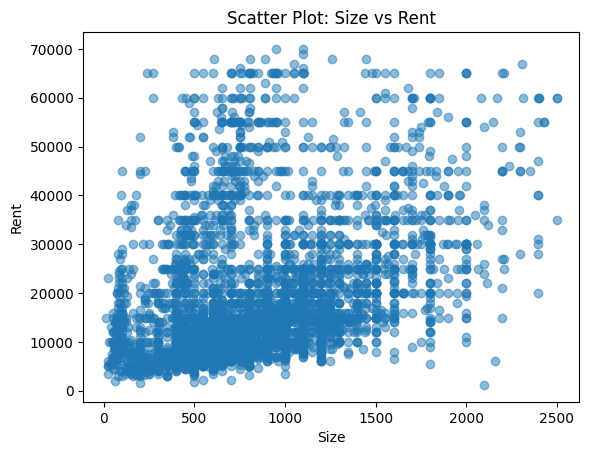

In [1992]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified columns
# Replace df with the actual name of your DataFrame

columns_to_compare = ['Size']

for column in columns_to_compare:
    plt.scatter(df_house_data[column], df_house_data['Rent'], alpha=0.5)
    plt.title(f'Scatter Plot: {column} vs Rent')
    plt.xlabel(column)
    plt.ylabel('Rent')
    plt.show()



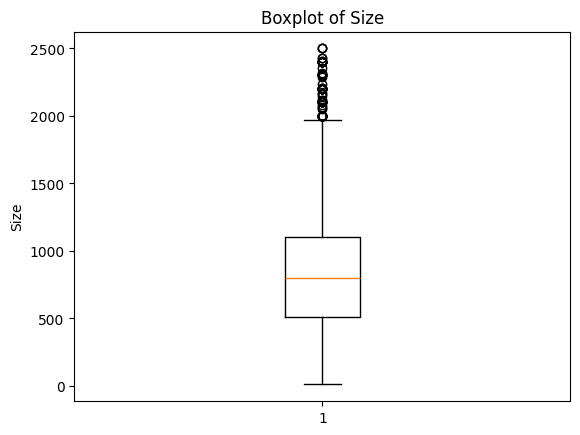

In [1993]:
plt.boxplot(df_house_data['Size'])
plt.title('Boxplot of Size')
plt.ylabel('Size')
plt.show()


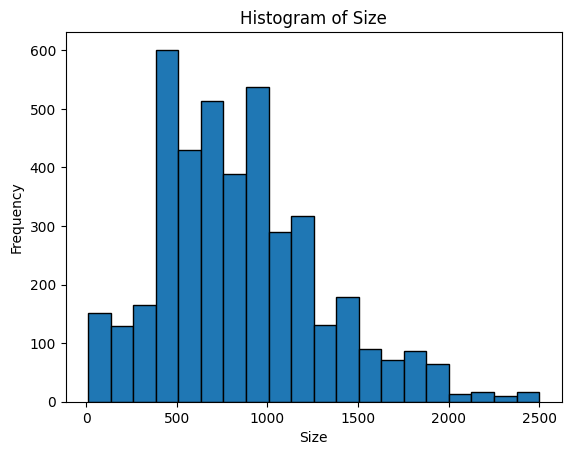

In [1994]:
plt.hist(df_house_data['Size'], bins=20, edgecolor='black')
plt.title('Histogram of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


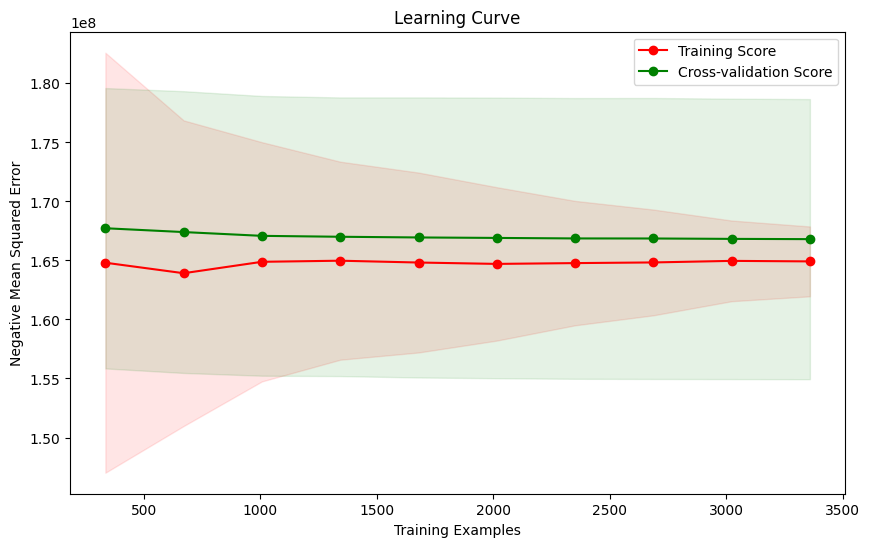

In [1995]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

# Assuming X and y are your feature matrix and target variable
# Replace X, y with the actual names of your data
X, y = df_house_data['Size'].values.reshape(-1, 1), df_house_data['Rent'].values

# Create a linear regression model
model = LinearRegression()

# Create learning curve data
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=ShuffleSplit(n_splits=100, test_size=0.2, random_state=42),
    scoring='neg_mean_squared_error'  # Use an appropriate scoring metric
)

# Calculate mean and standard deviation of scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Negative Mean Squared Error")  # Adjust the y-axis label based on your scoring metric
plt.legend(loc="best")
plt.show()


In [1996]:
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with the specified columns
# # Replace df with the actual name of your DataFrame

# columns_to_compare = ['Size', 'Area Type', 'Bathroom', 'FloorNo', 'TotalFloor']

# for column in columns_to_compare:
#     plt.scatter(df_house_data[column], df_house_data['Rent'], alpha=0.5)
#     plt.title(f'Scatter Plot: {column} vs Rent')
#     plt.xlabel(column)
#     plt.ylabel('Rent')
#     plt.show()

## Label and one-hot Encoding

In [1997]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

label_encoded_list = ['TotalFloor','Month','FloorNo','Area Locality','Area Type','Bathroom','BHK','Furnishing Status','Point of Contact','Tenant Preferred']

one_hot_encoded_list = ['City','Day']

df_encoded = df_house_data.copy()

label_encoder = LabelEncoder()
df_encoded[label_encoded_list] = df_encoded[label_encoded_list].apply(label_encoder.fit_transform)

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(df_encoded[one_hot_encoded_list])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(one_hot_encoded_list))
df_encoded = pd.concat([df_encoded, onehot_df], axis=1)

df_encoded.drop(one_hot_encoded_list, axis=1, inplace=True)
df_encoded=df_encoded.dropna()


## Before Scaling

In [1998]:
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# X = df_encoded.drop(columns='Rent')
# y = df_encoded['Rent']
# # Assuming X and y are your feature matrix and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a pipeline with PolynomialFeatures and StandardScaler
# model = make_pipeline(
#     PolynomialFeatures(2),
#     MinMaxScaler(),
#     LinearRegression()
# )

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model using R-squared on the test set
# r2_test = r2_score(y_test, y_pred)
# print("R-squared on Test Set (Polynomial Regression with Scaling):", r2_test)


In [1999]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import make_scorer, r2_score

# X = df_encoded.drop(columns='Rent')
# y = df_encoded['Rent']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and fit the Linear Regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model using R-squared on the test set
# r2_test = r2_score(y_test, y_pred)
# print("R-squared on Test Set:", r2_test)

In [2000]:
# from matplotlib import pyplot as plt
# from sklearn.metrics import mean_absolute_error
# mae = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute Error: {mae}')

# # Plot the actual vs. predicted values
# X_train, X_test, y_train, y_test
# plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.5)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs. Predicted Values')
# plt.show()

In [2001]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_encoded.drop(columns='Rent')
y = df_encoded['Rent']
# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2002]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression MSE:", np.sqrt(linear_mse))
print("Linear Regression R2 Score:", linear_r2)

Linear Regression MSE: 7993.1362634124835
Linear Regression R2 Score: 0.6727390164564104


Mean Absolute Error: 5822.934651190176


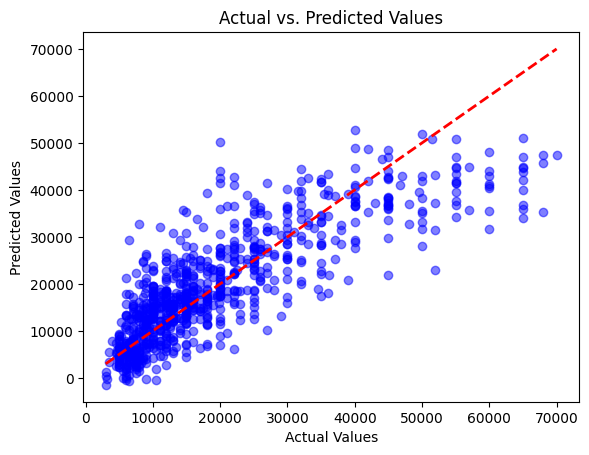

In [2003]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, linear_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the actual vs. predicted values
X_train, X_test, y_train, y_test
plt.scatter(y_test, linear_pred, c='blue', marker='o', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [2004]:
# Ridge Regression
ridge_reg = Ridge()
ridge_params = {'alpha': [0.1]}
ridge_grid = GridSearchCV(ridge_reg, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
ridge_pred = ridge_grid.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print("Ridge Regression MSE:", np.sqrt(ridge_mse))
print("Ridge Regression R2 Score:", ridge_r2)

Ridge Regression MSE: 7993.106825443361
Ridge Regression R2 Score: 0.6727414269948199


Mean Absolute Error: 5822.784013442967


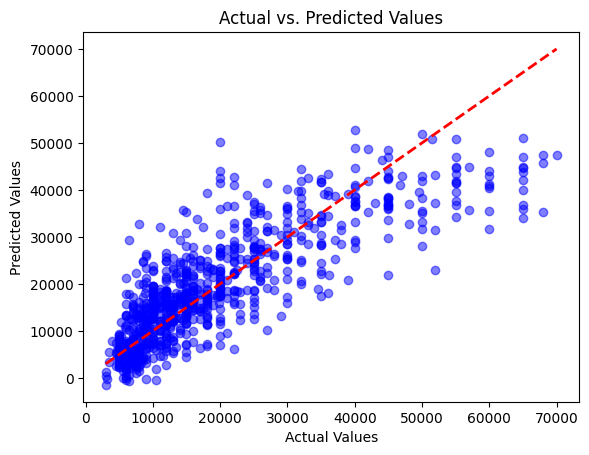

In [2005]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, ridge_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the actual vs. predicted values
X_train, X_test, y_train, y_test
plt.scatter(y_test, ridge_pred, c='blue', marker='o', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [2006]:
# Lasso Regression
lasso_reg = Lasso()
lasso_params = {'alpha': [0.1, 0.001]}
lasso_grid = GridSearchCV(lasso_reg, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
lasso_pred = lasso_grid.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print("Lasso Regression MSE:", np.sqrt(lasso_mse))
print("Lasso Regression R2 Score:", lasso_r2)

Lasso Regression MSE: 7993.0974123696715
Lasso Regression R2 Score: 0.6727421977857819


Mean Absolute Error: 5822.854274427624


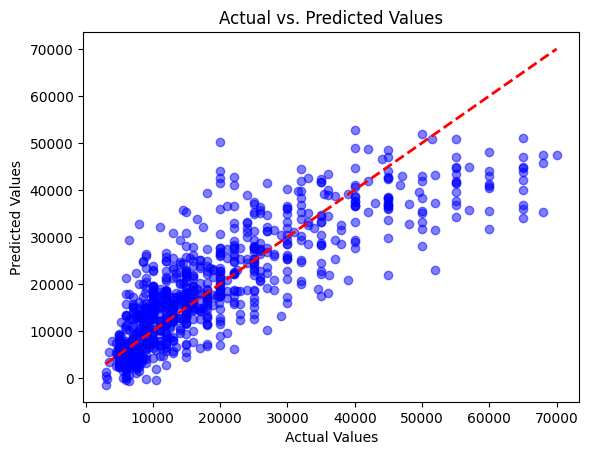

In [2007]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, lasso_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the actual vs. predicted values
X_train, X_test, y_train, y_test
plt.scatter(y_test, lasso_pred, c='blue', marker='o', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [2008]:
# Polynomial Regression
poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())
poly_params = {'polynomialfeatures__degree': [2]}
poly_grid = GridSearchCV(poly_reg, poly_params, cv=3)
poly_grid.fit(X_train, y_train)
poly_pred = poly_grid.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
print("Polynomial Regression MSE:", np.sqrt(poly_mse))
print("Polynomial Regression R2 Score:", poly_r2)

Polynomial Regression MSE: 7707.588142523363
Polynomial Regression R2 Score: 0.6957036116824209


Mean Absolute Error: 5479.382232635268


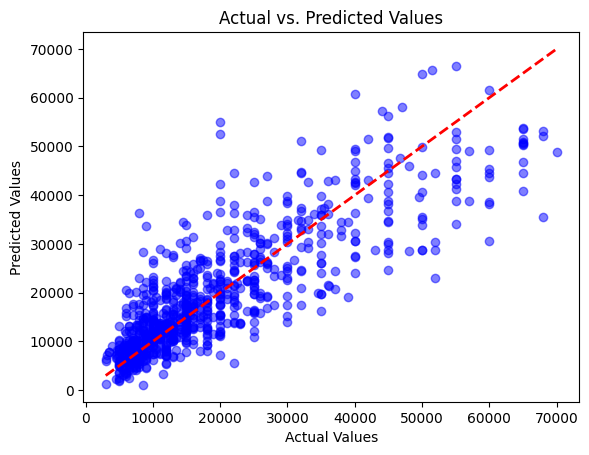

In [2009]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, poly_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the actual vs. predicted values
X_train, X_test, y_train, y_test
plt.scatter(y_test, poly_pred, c='blue', marker='o', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [2010]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression with Gradient Descent
degree = 2  # You can adjust the degree of the polynomial
num_iterations = 10000

poly_reg = make_pipeline(PolynomialFeatures(degree), StandardScaler(), SGDRegressor(max_iter=num_iterations, tol=1e-3))
poly_reg.fit(X_train, y_train)

# Evaluate Polynomial Regression with Gradient Descent
poly_gd_pred = poly_reg.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_gd_pred)
poly_r2 = r2_score(y_test, poly_gd_pred)

print(f"Polynomial Regression (Degree {degree}) with {num_iterations} Iterations MSE:", np.sqrt(poly_mse))
print(f"Polynomial Regression (Degree {degree}) with {num_iterations} Iterations R2 Score:", poly_r2)


Polynomial Regression (Degree 2) with 10000 Iterations MSE: 7914.722662406853
Polynomial Regression (Degree 2) with 10000 Iterations R2 Score: 0.6791284583847788


Mean Absolute Error: 5700.6618397594975


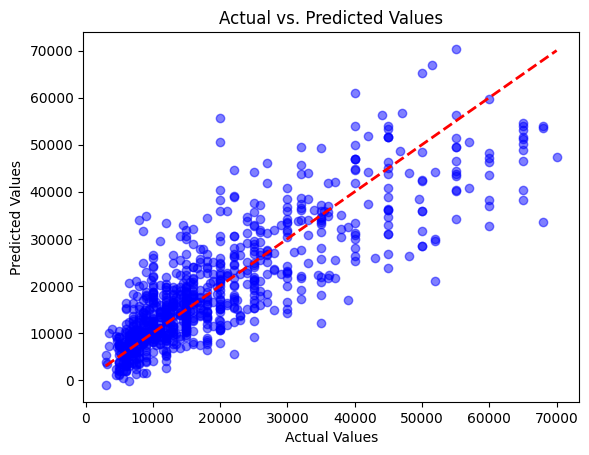

In [2011]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, poly_gd_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the actual vs. predicted values
X_train, X_test, y_train, y_test
plt.scatter(y_test, poly_gd_pred, c='blue', marker='o', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [2012]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming df_encoded contains your data and the target variable is 'Rent'
X = df_encoded.drop(columns='Rent')
y = df_encoded['Rent']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PolynomialFeatures and Linear Regression
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the polynomial feature names
poly = model.named_steps['polynomialfeatures']
poly_feature_names = [f'x{i}' for i in range(1, poly.n_output_features_ + 1)]

# Get the coefficients
coefficients = model.named_steps['linearregression'].coef_

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': poly_feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the DataFrame
print(coefficients_df)


    Feature   Coefficient  Absolute Coefficient
8        x9 -12358.554615          12358.554615
16      x17   9110.022195           9110.022195
248    x249   9110.022190           9110.022190
3        x4  -6285.013165           6285.013165
1        x2   5315.708998           5315.708998
..      ...           ...                   ...
258    x259      0.000000              0.000000
257    x258      0.000000              0.000000
256    x257      0.000000              0.000000
232    x233      0.000000              0.000000
263    x264      0.000000              0.000000

[276 rows x 3 columns]


In [2013]:
# # Identify features with non-zero coefficients
# non_zero_features = coefficients_df[coefficients_df['Coefficient'] != 0]['Feature']

# print("Features with non-zero coefficients:")
# print(non_zero_features>2)

In [2014]:
# from sklearn.linear_model import SGDRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# from sklearn.metrics import r2_score
# from sklearn.pipeline import make_pipeline

# # Assuming X_train, X_test, y_train, y_test are your training and test data
# # Also assuming X is your original feature matrix

# # Create a pipeline with StandardScaler and SGDRegressor
# model = make_pipeline(MinMaxScaler(), SGDRegressor(random_state=42))

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model using R-squared on the test set
# r2_test = r2_score(y_test, y_pred)
# print("R-squared on Test Set:", r2_test)


In [2015]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import Lasso
# from sklearn.metrics import r2_score
# from sklearn.pipeline import make_pipeline

# # Assuming X_train, X_test, y_train, y_test are your training and test data
# # Also assuming X is your original feature matrix

# # Set the degree for PolynomialFeatures and the alpha value for Lasso
# degree = 2  # You can adjust the degree based on the complexity you want
# alpha_value = 0.001  # Adjust the alpha value as needed

# # Create a pipeline with PolynomialFeatures and Lasso Regression
# model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_value))

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model using R-squared on the test set
# r2_test = r2_score(y_test, y_pred)
# print("R-squared on Test Set (Polynomial Regression with Lasso):", r2_test)



## Scaling

In [2016]:
# from sklearn.preprocessing import MinMaxScaler

# # Assuming X is your feature matrix
# X = df_encoded.drop(columns='Rent')
# y = df_encoded['Rent']

# # Initialize the MinMaxScaler for features
# scaler_X = MinMaxScaler()

# # Fit and transform the feature matrix
# X_scaled = scaler_X.fit_transform(X)

# # Initialize the MinMaxScaler for the target variable
# scaler_y = MinMaxScaler()

# # Reshape the target variable 'y' to a 2D array (required by MinMaxScaler)
# y_reshaped = y.values.reshape(-1, 1)

# # Fit and transform the target variable
# y_scaled = scaler_y.fit_transform(y_reshaped)


In [2017]:
# print(X_scaled.shape)
# print(y_scaled.shape)

In [2018]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression,PoissonRegressor,GammaRegressor
# from sklearn.metrics import r2_score
# from sklearn.pipeline import make_pipeline


# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
# # Create a pipeline with PolynomialFeatures and Linear Regression
# degree = 2  # You can adjust the degree based on the complexity you want
# model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model using R-squared on the test set
# r2_test = r2_score(y_test, y_pred)
# print("R-squared on Test Set (Polynomial Regression):", r2_test)

In [2019]:
# from matplotlib import pyplot as plt

# # Inverse transform the scaled predictions and actual values to the original scale
# y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
# y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# # Plot the actual vs. predicted values
# plt.scatter(y_test_original, y_pred_original, c='blue', marker='o', alpha=0.5)
# plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], linestyle='--', color='red', linewidth=2)
# plt.xlabel('Actual Values (Original Scale)')
# plt.ylabel('Predicted Values (Original Scale)')
# plt.title('Actual vs. Predicted Values (Polynomial Regression)')
# plt.show()
